<a href="https://colab.research.google.com/github/kevinMGII/Grupo7-Practica1/blob/main/Grupo7_Practica1_ModeloFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELO FINAL**. Predicción del Abandono de Empleados.

Grupo 7. Miembros:

*   *Kevin Medina García, 100495893.*
*   *Bárbara Sánchez Moratalla, 100495857.*

---


En este cuaderno utilizamos el modelo final y lo usamos para obtener predicciones para el conjunto de datos de competición. El objetivo es predecir la variable "Attrition" para observar la cantidad de empleados que abandonan la empresa. Los resultados se almacenan en el archivo predicciones.csv.

- Carga de librerías necesarias

In [ ]:
import pandas as pd                                                             # Librería usada para leer el .csv y crear el dataframe
import joblib                                                                   # Librería usada para cargar el modelo final
from sklearn.compose import ColumnTransformer                                   # Librería usada para el preprocesamiento de datos
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder                 # Librería usada para codificar var categóricas y ordinales en el ColumnTransformer
import matplotlib.pyplot as plt                                                 # Librería usada para visualizar las predicciones del abandono de empleados

- Lectura de datos de competición y modelo final

In [ ]:
data_test = pd.read_csv("./attrition_competition_12.csv.gz")                    # Cargamos el conjunto de datos de test utilizando el almacenamiento local de Google Colab.
modelo_final = joblib.load("./modelo_final.pkl")                                # Cargamos el modelo final

- Realizamos las predicciones

In [ ]:
# 1. DEFINICIÓN DE VARIABLES

categorical_features = ['Department', 'EducationField', 'JobRole']              # Lista de atributos categóricos
ordinal_features = ['BusinessTravel', 'Gender', 'MaritalStatus']                # Lista de atributos ordinales
drop_columns = ["EmployeeID", "EmployeeCount", "Over18", "StandardHours"]       # Lista con las columnas innecesarias. Análisis anteriores.

ordinal_mapping = [                                                             # Lista con los posibles valores de las variables ordinales
    ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],                       # Posibles valores de BusinnesTravel
    ['Male', 'Female'],                                                         # Posibles valores de Gender
    ['Married', 'Divorced', 'Single']                                           # Posibles valores de MaritalStatus
]

print("Completado - Definición de Variables.")                                  # Mostramos un mensaje por pantalla, funcionamiento correcto

Completado - Definición de Variables.


In [ ]:
# 2.- PREPROCESAMIENTO DE DATOS

preprocesador = ColumnTransformer(                                               # Utilizamos ColumnTransformer para aplicar transformar columnas no numéricas a numéricas
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),             # Aplicamos OneHotEncoding a las variables categóricas
        ('ord', OrdinalEncoder(categories=ordinal_mapping), ordinal_features)   # Aplicamos OrdinalEndocing a las variables ordinales
    ],
    remainder='passthrough'                                                     # Mantenemos las columnas numéricas sin cambios
)

data_test = data_test.drop(columns=drop_columns)                                            # Eliminamos las columnas innecesarias
data_test = data_test.drop(columns=["Attrition"], errors='ignore')                          # Eliminamos la columna Attrition del conjunto de test

data_test = preprocesador.fit_transform(data_test)                                           # Eliminamos las columnas innecesarias
data_test = pd.DataFrame(data_test, columns=preprocesador.get_feature_names_out())           # Utilizamos el preprocessor.fit para aplicarlo

print("Completado - Preprocesamiento de Datos.")                                # Mostramos un mensaje por pantalla, funcionamiento correcto

Completado - Preprocesamiento de Datos.


In [ ]:
# 3. PREDICCIÓN Y RESULTADOS

y_pred_test = modelo_final.predict(data_test)                                   # Generamos predicciones con el modelo entrenado, predicciones sobre los datos de test
df_predicciones = pd.DataFrame(y_pred_test, columns=["Predicción"])             # Creamos un dataframe con las predicciones

print(df_predicciones["Predicción"].value_counts())                             # Mostramos un mensaje por pantalla, predicciones realizadas
df_predicciones.to_csv("predicciones.csv", index=False)                         # Almacenamos las predicciones en el fichero "predicciones.csv"

Predicción
0    1236
1     234
Name: count, dtype: int64


---

Concluimos la práctica interpretando los resultados que ha obtenido nuestro modelo. Como podemos observar:

- **Clase 0 (No abandonan)**: nuestro modelo predice que 1233 empleados permanecerán en la empresa, es decir, no muestran señales de agotamiento o querer abandonar.

- **Clase 1 (Abandona)**: nuestro modelo también predice que 237 probablemente abandonarán. La empresa puede utilizar esta información para comunicarle al departamento de RRHH las intenciones de los empleados y que puedan anticiparse y tomar decisiones internas.

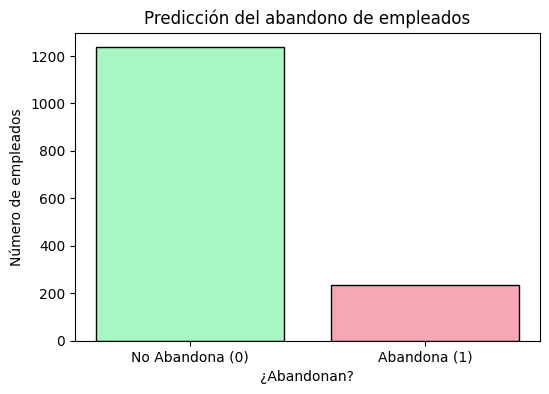

In [ ]:
predicciones = df_predicciones["Predicción"]                                    # Sacamos la columna de predicciones
conteo_por_clase = predicciones.value_counts()                                  # Cuantas veces aparece cada clase (Si/No)
conteo = conteo_por_clase.sort_index()                                          # Ordenamos primero 0 y luego 1

eje_x = ['No Abandona (0)', 'Abandona (1)']                                     # Etiquetas del eje x
colores = ['#a7f6c4', '#f6a7b4']                                                # Colores pastel representativos (hexa obtenido de Photoshop)

plt.figure(figsize=(6, 4))                                                      # Tamaño que tiene el grafico
plt.bar(eje_x, conteo, color=colores, edgecolor='black')                        # Creamos el grafico
plt.title("Predicción del abandono de empleados")                               # Título para el grafico
plt.ylabel("Número de empleados")                                               # Etiqueta para el eje y
plt.xlabel("¿Abandonan?")                                                       # Etiqueta para el eje x
plt.show()                                                                      # Mostramos el grafico